Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.

Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.

Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.



In [1]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import lightgbm as lgb
import xgboost as xgb

In [3]:
# ===============================================
# Step 2: Load the Dataset
# ===============================================
train_df = pd.read_csv("/content/Titanic_train-1.csv")
test_df = pd.read_csv("/content/Titanic_train-1.csv")
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
print(train_df.head())


Train Shape: (891, 12)
Test Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

In [8]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
# ===============================================
# Check missing values
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())


Missing Values in Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-1766364307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='coolwarm')


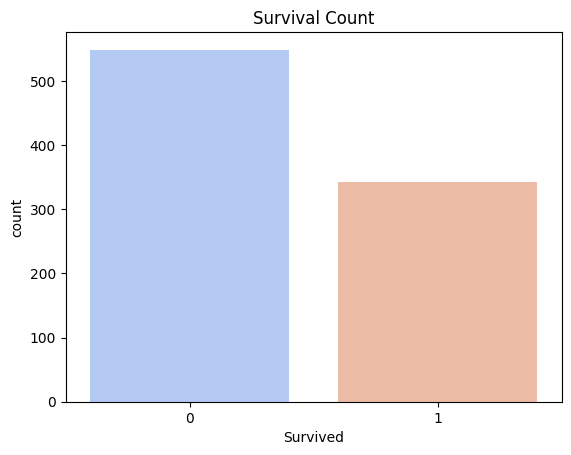

In [9]:
# Plot survival counts
sns.countplot(x='Survived', data=train_df, palette='coolwarm')
plt.title("Survival Count")
plt.show()

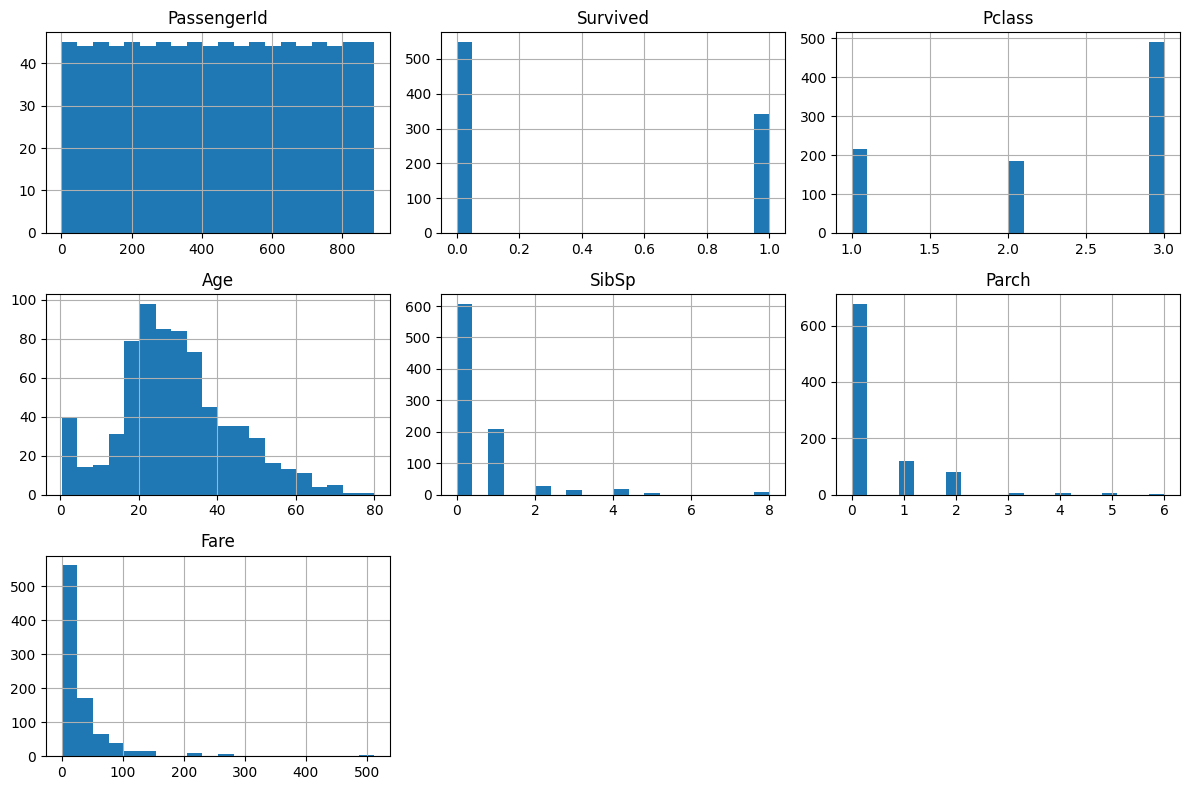

In [10]:
# Histogram for numerical columns
train_df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

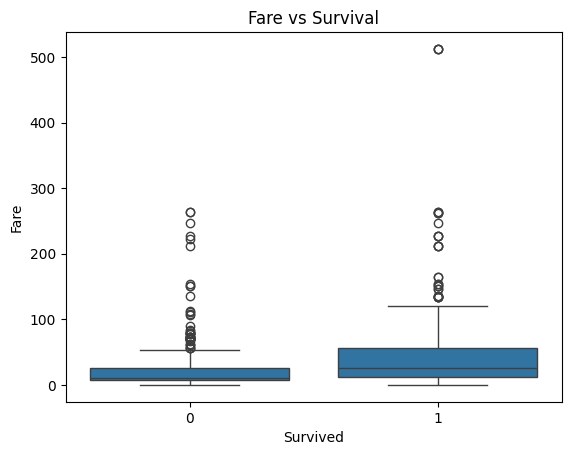

In [11]:
# Boxplot for Fare distribution
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title("Fare vs Survival")
plt.show()

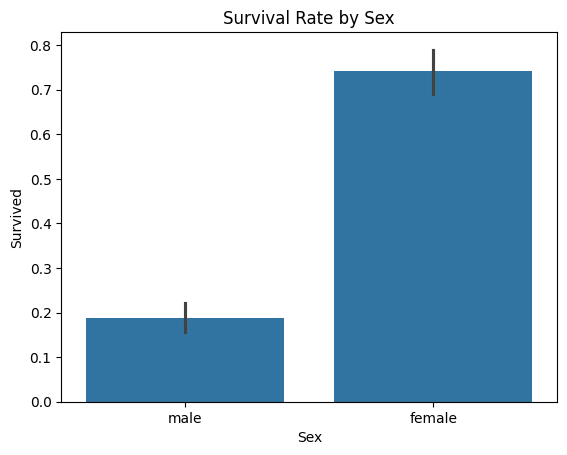

In [12]:
# Bar plot: Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Survival Rate by Sex")
plt.show()


# Step 4: Data Preprocessing

In [13]:
# Combine train and test for consistent preprocessing
full_data = pd.concat([train_df, test_df], sort=False)

In [14]:
# Fill missing Age with median
full_data['Age'] = full_data['Age'].fillna(full_data['Age'].median())


In [15]:
# Fill missing Embarked with mode
full_data['Embarked'] = full_data['Embarked'].fillna(full_data['Embarked'].mode()[0])

In [16]:
# Fill missing Fare in test data
full_data['Fare'] = full_data['Fare'].fillna(full_data['Fare'].median())


In [17]:
# Drop Cabin (too many missing values)
full_data.drop(columns=['Cabin'], inplace=True)


In [18]:
 #Convert Sex and Embarked to numeric using Label Encoding
le = LabelEncoder()
full_data['Sex'] = le.fit_transform(full_data['Sex'])
full_data['Embarked'] = le.fit_transform(full_data['Embarked'])


In [19]:
# Create new feature: Family Size
full_data['FamilySize'] = full_data['SibSp'] + full_data['Parch'] + 1

# Step 5: Split back into train and test sets

In [20]:

train_processed = full_data.iloc[:len(train_df), :]
test_processed = full_data.iloc[len(train_df):, :]

In [22]:

X = train_processed.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = train_processed['Survived']
X_test_final = test_processed.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])


# Step 6: Train-Test Split for Evaluation

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#Step 7: LightGBM Model

In [24]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [25]:
# Evaluation
print("\nLightGBM Classification Report:")
print(classification_report(y_val, y_pred_lgb))


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Step 8: XGBoost Model

In [27]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:26:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
print("\nXGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       110
           1       0.74      0.72      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# Step 9: Cross-Validation Scores

In [30]:
lgb_cv = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy').mean()
xgb_cv = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy').mean()
print("\nAverage CV Accuracy:")
print(f"LightGBM: {lgb_cv:.4f}")
print(f"XGBoost: {xgb_cv:.4f}")

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:26:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:26:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:26:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:26:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:26:45] WARNING: /w

# Step 10: Comparative Analysis Visualization

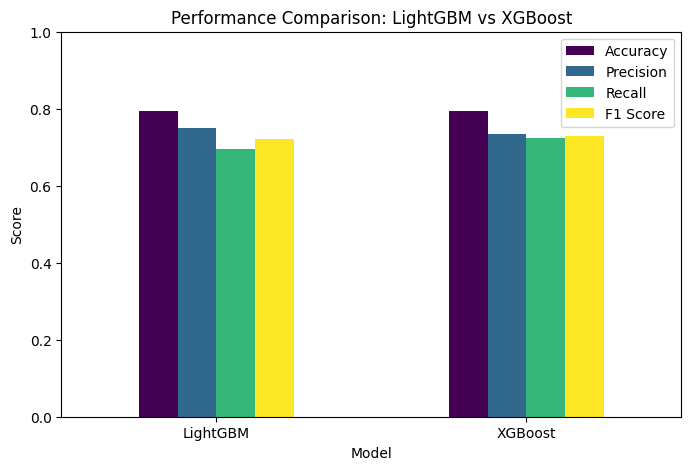

In [31]:

metrics_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_val, y_pred_lgb), accuracy_score(y_val, y_pred_xgb)],
    'Precision': [precision_score(y_val, y_pred_lgb), precision_score(y_val, y_pred_xgb)],
    'Recall': [recall_score(y_val, y_pred_lgb), recall_score(y_val, y_pred_xgb)],
    'F1 Score': [f1_score(y_val, y_pred_lgb), f1_score(y_val, y_pred_xgb)]
})

metrics_df.set_index('Model').plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# Step 11: Final Prediction on Test Data

In [32]:
final_pred_lgb = lgb_model.predict(X_test_final)
final_pred_xgb = xgb_model.predict(X_test_final)

submission_lgb = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_pred_lgb
})
submission_xgb = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_pred_xgb
})

submission_lgb.to_csv("submission_lightgbm.csv", index=False)
submission_xgb.to_csv("submission_xgboost.csv", index=False)

print("\nSubmissions saved: submission_lightgbm.csv, submission_xgboost.csv")


Submissions saved: submission_lightgbm.csv, submission_xgboost.csv
